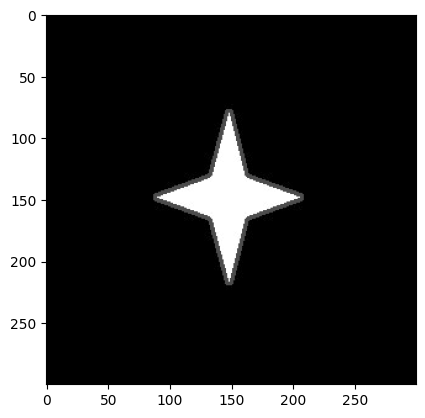

In [126]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

origin = cv2.imread('../datasets/conv_def_img.png')
img = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

In [150]:
rect, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts  = imutils.grab_contours(cnts)
cnt = cnts[0]
len(cnt)

204

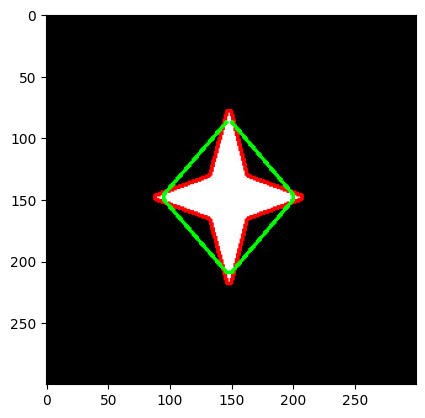

In [128]:

hull_point = cv2.convexHull(cnt, returnPoints=True)
copy = origin.copy()

# draw connection by convex point
for i in range(len(hull_point) - 1):
    cv2.line(copy, tuple(hull_point[i][0]), tuple(hull_point[i+1][0]), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

In [129]:
print('point\n', hull_point)

point
 [[[150  87]]

 [[200 146]]

 [[200 150]]

 [[150 209]]

 [[146 209]]

 [[ 95 150]]

 [[ 95 146]]

 [[146  87]]]


start: (146, 87) end: (95, 146) far: (135, 130)
start: (95, 150) end: (146, 209) far: (135, 166)
start: (150, 209) end: (200, 150) far: (160, 166)
start: (200, 146) end: (150, 87) far: (160, 130)


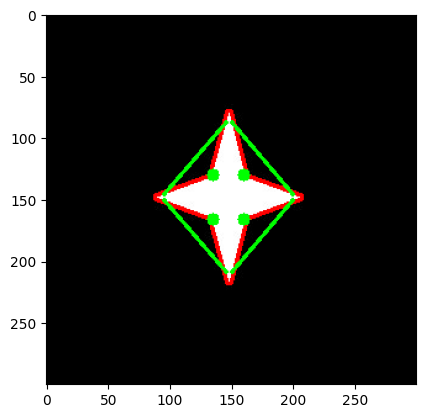

In [151]:
hull = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(cnt, hull)

copy = origin.copy()
for i in range(defects.shape[0]):
    sidx, eidx, fidx, d = defects[i][0]
    start = tuple(cnt[sidx][0])
    end = tuple(cnt[eidx][0])
    far = tuple(cnt[fidx][0])
    print('start:', start, 'end:', end, 'far:', far)
    
    cv2.line(copy, start, end, [0, 255, 0], 2)
    cv2.circle(copy, far, 5, [0, 255, 0], -1)
    
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

In [131]:
print('hull:\n', hull)
print('defects:\n', defects)

hull:
 [[203]
 [154]
 [153]
 [104]
 [103]
 [ 52]
 [ 51]
 [  0]]
defects:
 [[[   0   51   23 5068]]

 [[  52  103   80 5068]]

 [[ 104  153  125 5164]]

 [[ 154  203  182 5164]]]
